Import numpy, pandas, and matplotlib

In [1]:
import pandas as pd
import numpy
import matplotlib.pyplot as plt

Use numpy to load the data file, then store the data in a variable

In [2]:
data = numpy.loadtxt("Skyserver_Spectro2_13_2018 10_41_13 PM.csv", skiprows = 2, delimiter = ",")

Store names of colums in list names

In [3]:
names = numpy.loadtxt("Skyserver_Spectro2_13_2018 10_41_13 PM.csv", dtype=str, skiprows = 1, delimiter = ",")[0]

Create a dataframe from the csv file.

In [4]:
df = pd.read_csv("/Users/marin/machine/redshift_data_project/Skyserver_Spectro2_13_2018 10_41_13 PM.csv", \
                 delimiter = ",", skiprows=1)
df.head()

,objid,ra,dec,u,g,r,i,z,redshift,specobjid,plate,mjd,fiberid
0,1237645879551000764,348.841087,1.268802,25.92735,20.99570,19.24612,18.56461,18.43049,0.399651,4825695603672457216,4286,55499,322
1,1237645879551066262,348.902530,1.271886,19.38905,18.24496,17.58728,17.20807,16.90905,0.032125,430194949951088640,382,51816,368
2,1237645879562928144,16.004912,1.259423,21.50923,19.69340,18.47973,17.91998,17.55132,0.312048,754455784200366080,670,52520,374
3,1237645879562928258,16.020244,1.267667,20.96947,20.29136,19.36779,18.86387,18.45551,0.200468,754453860055017472,670,52520,367
4,1237645879562928805,16.026029,1.266772,25.27165,22.32081,21.33033,19.94852,19.47201,0.752645,4853831831466778624,4311,55506,281


Filter out values of -9999 and 0 from columns, leaving only actual data

In [5]:
df_filtered = df[(df['i'] != -9999.0) & (df['z'] != -9999.0) & (df['redshift'] != 0.00)]
df_filtered.head()

,objid,ra,dec,u,g,r,i,z,redshift,specobjid,plate,mjd,fiberid
0,1237645879551000764,348.841087,1.268802,25.92735,20.99570,19.24612,18.56461,18.43049,0.399651,4825695603672457216,4286,55499,322
1,1237645879551066262,348.902530,1.271886,19.38905,18.24496,17.58728,17.20807,16.90905,0.032125,430194949951088640,382,51816,368
2,1237645879562928144,16.004912,1.259423,21.50923,19.69340,18.47973,17.91998,17.55132,0.312048,754455784200366080,670,52520,374
3,1237645879562928258,16.020244,1.267667,20.96947,20.29136,19.36779,18.86387,18.45551,0.200468,754453860055017472,670,52520,367
4,1237645879562928805,16.026029,1.266772,25.27165,22.32081,21.33033,19.94852,19.47201,0.752645,4853831831466778624,4311,55506,281


In [6]:
print(df.shape)
print(df_filtered.shape)

(1000, 13)
(998, 13)


In [7]:
final_df = df_filtered[(df_filtered['redshift'] > 0.01)]
final_df.head()
print(final_df.shape)
print(min(final_df['redshift']))

(886, 13)
0.01949213


Eliminates outliers in the redshift column by taking the absolute value of the difference between each value in redshift and the mean value, and keeping it in the dataframe if it's less than or equal to 3 times the standard deviation of the redshift.

In [8]:
no_outliers_df = final_df[numpy.abs(final_df['redshift']-final_df['redshift'].mean())\
                             <=(5*final_df['redshift'].std())]
no_outliers_df.head()

,objid,ra,dec,u,g,r,i,z,redshift,specobjid,plate,mjd,fiberid
0,1237645879551000764,348.841087,1.268802,25.92735,20.99570,19.24612,18.56461,18.43049,0.399651,4825695603672457216,4286,55499,322
1,1237645879551066262,348.902530,1.271886,19.38905,18.24496,17.58728,17.20807,16.90905,0.032125,430194949951088640,382,51816,368
2,1237645879562928144,16.004912,1.259423,21.50923,19.69340,18.47973,17.91998,17.55132,0.312048,754455784200366080,670,52520,374
3,1237645879562928258,16.020244,1.267667,20.96947,20.29136,19.36779,18.86387,18.45551,0.200468,754453860055017472,670,52520,367
4,1237645879562928805,16.026029,1.266772,25.27165,22.32081,21.33033,19.94852,19.47201,0.752645,4853831831466778624,4311,55506,281


Creates equivalents to y and x_rot using the filtered dataframe instead.

In [9]:
y = no_outliers_df['redshift']
x = no_outliers_df.iloc[:,3:8]
x.head()

,u,g,r,i,z
0,25.92735,20.99570,19.24612,18.56461,18.43049
1,19.38905,18.24496,17.58728,17.20807,16.90905
2,21.50923,19.69340,18.47973,17.91998,17.55132
3,20.96947,20.29136,19.36779,18.86387,18.45551
4,25.27165,22.32081,21.33033,19.94852,19.47201


(0, 1)

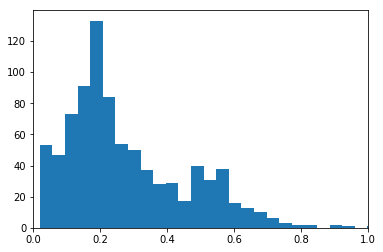

In [10]:
plt.hist(no_outliers_df['redshift'], bins=100)
plt.xlim(0,1)

# Support Vector Regression

In [11]:
from sklearn import svm
clf = svm.SVR() 

In [12]:
clf.fit(x, y)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [13]:
x_list = []
for column in x:
    x_list.append(min(x[column]))
    x_list.append(max(x[column]))
print(x_list)

[17.54884, 27.24833, 15.75164, 25.424970000000002, 14.910029999999999, 29.72628, 14.406789999999999, 24.36178, 14.0132, 22.82687]


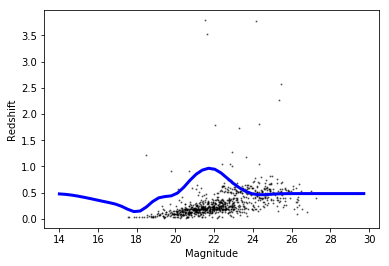

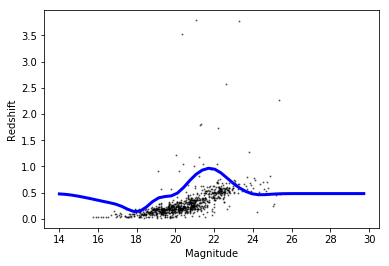

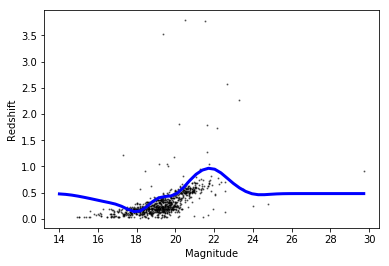

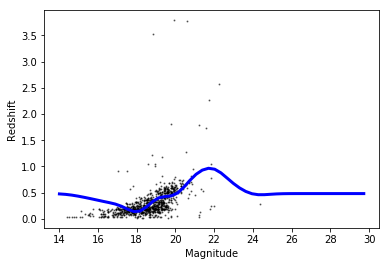

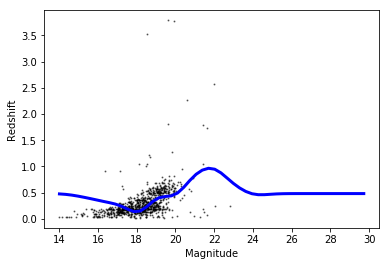

In [14]:
one_x_for_plotting = numpy.linspace(min(x_list), max(x_list), 50)
x_for_plotting = numpy.asarray([one_x_for_plotting, one_x_for_plotting, one_x_for_plotting, one_x_for_plotting, \
                               one_x_for_plotting])
y_for_grid = clf.predict(x_for_plotting.T)

for i in range(5):
    plt.scatter(x.iloc[:,i], y, color='black',s=1, alpha=0.5)
    plt.plot(x_for_plotting[i], y_for_grid,  color='blue', linewidth = 3)
    plt.xlabel("Magnitude")
    plt.ylabel("Redshift")
    plt.show()

In [15]:
def chi_square_error(observed_y, predicted_y):
    error = 0
    observed_y_list = observed_y.tolist()
    predicted_y_list = predicted_y.tolist()
    for i in predicted_y_list:
        error += ((observed_y_list[predicted_y_list.index(i)] - i)**2)/numpy.var(predicted_y)**2
    print(error)

chi_square_error(y, y_for_grid)

4233.445115033483


# Linear Regression

In [16]:
from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit (x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

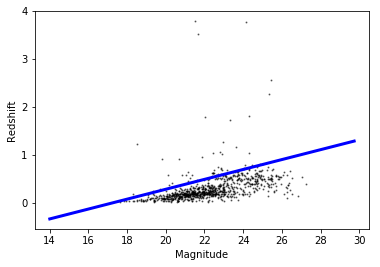

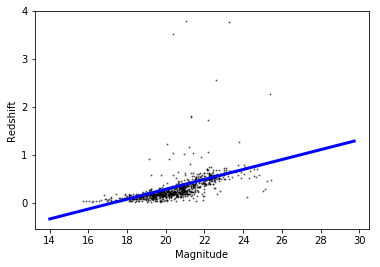

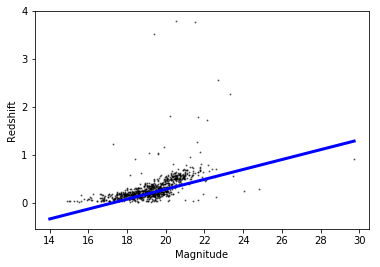

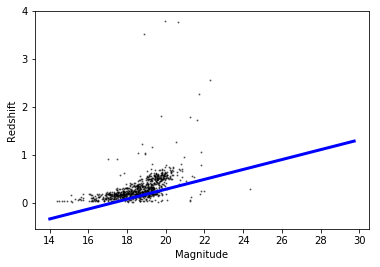

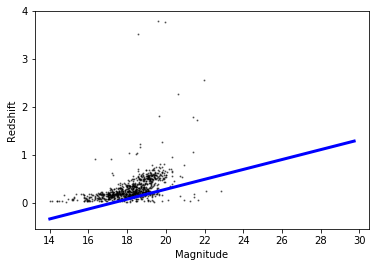

In [17]:
linear_y_for_grid = reg.predict(x_for_plotting.T)

for i in range(5):
    plt.scatter(x.iloc[:,i], y, color='black',s=1, alpha=0.5)
    plt.plot(x_for_plotting[i], linear_y_for_grid,  color='blue', linewidth = 3)
    plt.xlabel("Magnitude")
    plt.ylabel("Redshift")
    plt.show()

In [18]:
chi_square_error(y, linear_y_for_grid)

312.64586268674816


# LARS

In [19]:
lars = linear_model.Lars(n_nonzero_coefs=1)
lars.fit (x,y)

Lars(copy_X=True, eps=2.220446049250313e-16, fit_intercept=True,
   fit_path=True, n_nonzero_coefs=1, normalize=True, positive=False,
   precompute='auto', verbose=False)

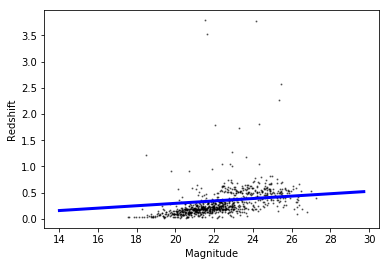

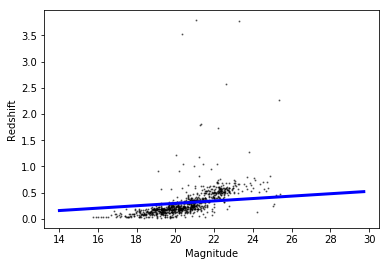

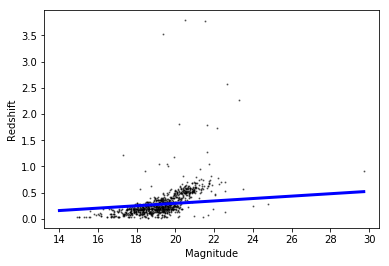

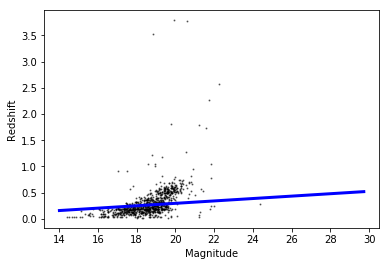

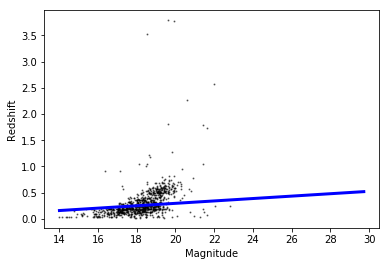

In [20]:
lars_y_for_grid = lars.predict(x_for_plotting.T)

for i in range(5):
    plt.scatter(x.iloc[:,i], y, color='black',s=1, alpha=0.5)
    plt.plot(x_for_plotting[i], lars_y_for_grid,  color='blue', linewidth = 3)
    plt.xlabel("Magnitude")
    plt.ylabel("Redshift")
    plt.show()

In [21]:
chi_square_error(y, lars_y_for_grid)

20817.296763890412


# Bayesian Ridge Regression

In [22]:
brr = linear_model.BayesianRidge()
brr.fit (x,y)

BayesianRidge(alpha_1=1e-06, alpha_2=1e-06, compute_score=False, copy_X=True,
       fit_intercept=True, lambda_1=1e-06, lambda_2=1e-06, n_iter=300,
       normalize=False, tol=0.001, verbose=False)

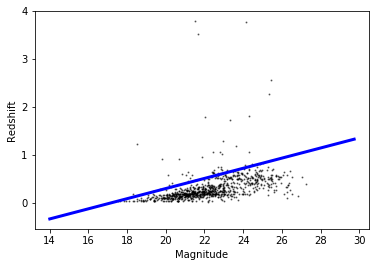

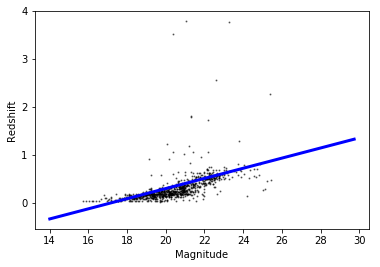

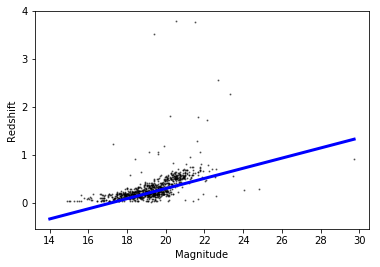

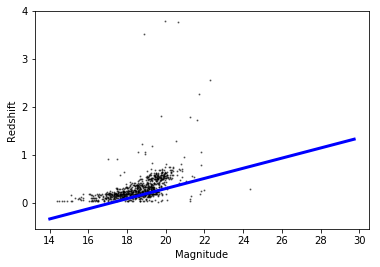

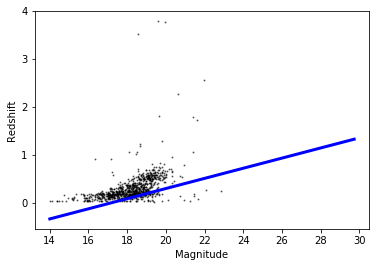

In [23]:
brr_y_for_grid = brr.predict(x_for_plotting.T)
for i in range(5):
    plt.scatter(x.iloc[:,i], y, color='black',s=1, alpha=0.5)
    plt.plot(x_for_plotting[i], brr_y_for_grid,  color='blue', linewidth = 3)
    plt.xlabel("Magnitude")
    plt.ylabel("Redshift")
    plt.show()

In [24]:
chi_square_error(y, brr_y_for_grid)

298.89598026003915
